## 1.- Importar librerías

In [110]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

In [111]:
os.listdir()
"vamo"

'vamo'

## 2.- Obtener archivos

In [112]:
files_total_ent = glob.glob('data/inem/agrupados/total_estatal/*.csv')
files_total_mun = glob.glob('data/inem/agrupados/total_mun/*.csv')
files_fuentes_ent = glob.glob('data/inem/agrupados/fuentes_gral/*_ent/*.csv')
files_fuentes_mun = glob.glob('data/inem/agrupados/fuentes_gral/*_mun/*.csv')
file_fuentes_ent = glob.glob('data/inem/agrupados/fuentes_gral/*.csv')
file_fuentes_ent

['data/inem/agrupados/fuentes_gral\\INEM-2005-Fuente-entidades.csv']

In [113]:
renameCols = {
    "Entidad Fed.":"nom_ent",
    "ESTADO":"nom_ent",
    "ESTADO":"nom_ent",
    "cve.edo.":"cve_ent",
    "cvemun":"cve_mun",
    "cveedo":"cve_ent",
    "cveestado":"cve_ent",
    "cvemunicipio":"cve_mun",
    "estado":"nom_ent",
    "cvedeestado":"cve_ent",
    "municipio":"nom_mun",
    "cvedemunicipio":"cve_mun",
    "pm25":"pm2.5",
    "año":"year",
    "Añño":"year",
    "entidadfed.":"nom_ent",
    'municipioodeleg.': 'nom_mun',
}

emisiones = ['pm10', 'pm2.5',  'co', 'nox', 'cov', 'nh3','so2']

In [114]:
estados_rename = {
  'Coahuila De Zaragoza': 'Coahuila',
  'Michoacan De Ocampo': 'Michoacán',
  'Michoacán De Ocampo': 'Michoacán',
  'Michoacan':'Michoacán',
  'Mexico': 'México',
  'Nuevo Leon': 'Nuevo León',
  'Queretaro Arteaga': 'Querétaro',
  'Queretaro': 'Querétaro',
  'San Luis Potosi':'San Luis Potosí',
  'Veracruz De Ignacio De La Llave': 'Veracruz',
  'Yucatan': 'Yucatán',
  'Distrito Federal': 'Ciudad de México',
  'Ciudad De México': 'Ciudad de México',
}

estados = [
  'Aguascalientes',
  'Baja California',
  'Baja California Sur',
  'Campeche',
  'Chiapas',
  'Chihuahua',
  'Ciudad de México',
  'Coahuila',
  'Colima',
  'Durango',
  'Guanajuato',
  'Guerrero',
  'Hidalgo',
  'Jalisco',
  'Michoacán',
  'Morelos',
  'México',
  'Nayarit',
  'Nuevo León',
  'Oaxaca',
  'Puebla',
  'Querétaro',
  'Quintana Roo',
  'San Luis Potosí',
  'Sinaloa',
  'Sonora',
  'Tabasco',
  'Tamaulipas',
  'Tlaxcala',
  'Veracruz',
  'Yucatán',
  'Zacatecas'
]


len(estados)

32

In [115]:
def readAppendSectoresFiles(files):
  df = pd.DataFrame()
  
  for f in files:
    
    try:
      dfi = pd.read_csv(f)
      
    except UnicodeDecodeError:
      dfi = pd.read_csv(f, encoding="latin1") 
      
    fuente = f.split("-")[3]
    year = f.split("-")[1]
    dfi["fuente"] = fuente
    dfi["year"] = year
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    
    dfi.rename(columns=renameCols, inplace=True)
    df = pd.concat([df, dfi])
    
    
  # make columns emisiones to float64
  for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
    #dfi[e] = dfi[e].str.replace(",", "")
    df[e] = df[e].astype("float64")
    
    
  return df

#colStateTotal = ['nom_ent', 'year', 'pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']
def readAppendTotalFiles(files):
  df = pd.DataFrame()

  for f in files:
    
    year = f.split("-")[1]
    tipo = f.split("-")[-1]
    
    try:
      
      dfi = pd.read_csv(f)
      
    except:
      
      dfi = pd.read_csv(f, encoding="latin1") 
      
    # keep only first 32 rows
    #dfi = dfi.iloc[:32]
       
    # if year = "2005", remove "Municipio" column
    if year == "2005" and tipo ==  "municipal.csv":
      dfi.drop(columns=["Municipio"], inplace=True)   
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    dfi.rename(columns=renameCols, inplace=True)
  
    dfi["year"] = year
    

    
 
    for e in ['pm10', 'pm2.5','so2', 'co', 'nox', 'cov', 'nh3']:
      # check if column is type string
      if dfi[e].dtype != "object":
        continue
      
      # remove "," in values
      dfi[e] = dfi[e].str.replace(",", "")
        
      dfi[e] = dfi[e].astype("float64")

    #dfi = dfi[colStateTotal]
    df = pd.concat([df, dfi])
    
  return df



## Fuentes estatal municipal

In [116]:
fuentes_entidad_2005 = pd.read_csv(file_fuentes_ent[0])
## remove empty spaces in column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.replace(" ", "")
    
## lowercase column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.lower()
fuentes_entidad_2005.rename(columns=renameCols, inplace=True)
# make columns emisiones to float64
for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].str.replace(",", "")
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].astype("float64")
  
fuentes_entidad_2005.head()

,year,fuente,cve_ent,nom_ent,pm10,pm2.5,so2,co,nox,cov,nh3
0,2005,AREA,1.0,AGUASCALIENTES,4159.26,2921.86,4184.56,20816.05,3477.93,19337.84,20899.68
1,2005,AREA,2.0,BAJA CALIFORNIA,11663.15,8612.71,16784.09,75208.42,12350.39,52375.69,12162.86
2,2005,AREA,3.0,BAJA CALIFORNIA SUR,4024.20,3034.90,1793.27,22071.83,2698.27,11472.82,3215.62
3,2005,AREA,4.0,CAMPECHE,6654.25,4873.10,1992.62,36258.78,3559.64,15777.77,10900.75
4,2005,AREA,5.0,COAHUILA,9489.41,6094.22,13293.27,38034.03,12457.83,46581.64,18073.55


In [117]:
replace_emision = {
  'pm10': '$PM_{10}$',
  'pm2.5': '$PM_{2.5}$',
  'co': '$CO$',
  'nox':'$NO_x$',
  'cov':'$COV$',
  'nh3':'$NH_3$',
  'so2':"$SO_2$"
}



In [118]:
fuentes_ent = readAppendSectoresFiles(files_fuentes_ent)
fuentes_ent = pd.concat([ fuentes_entidad_2005, fuentes_ent])
fuentes_ent = pd.melt(fuentes_ent, id_vars=["nom_ent", "cve_ent", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].str.title()
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].replace(estados_rename)
fuentes_ent["emision"] = fuentes_ent["emision"].replace(replace_emision)

# keep only states in estados list
fuentes_ent = fuentes_ent[fuentes_ent["nom_ent"].isin(estados)]



fuentes_mun = readAppendSectoresFiles(files_fuentes_mun)
fuentes_mun = pd.melt(fuentes_mun, id_vars=["nom_ent", "cve_ent", "nom_mun", "cve_mun", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].str.title()
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].replace(estados_rename)

# keep only states in estados list
fuentes_mun = fuentes_mun[fuentes_mun["nom_ent"].isin(estados)]
fuentes_mun["emision"] = fuentes_mun["emision"].replace(replace_emision)
fuentes_ent.head()

,nom_ent,cve_ent,fuente,year,emision,emisiones
0,Aguascalientes,1.0,AREA,2005,$PM_{10}$,4159.26
1,Baja California,2.0,AREA,2005,$PM_{10}$,11663.15
2,Baja California Sur,3.0,AREA,2005,$PM_{10}$,4024.20
3,Campeche,4.0,AREA,2005,$PM_{10}$,6654.25
4,Coahuila,5.0,AREA,2005,$PM_{10}$,9489.41


In [119]:
fuentes_mun.head()

,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,$PM_{10}$,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,$PM_{10}$,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,$PM_{10}$,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,$PM_{10}$,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,$PM_{10}$,431.452577


## Total estatal municipal

In [120]:
files_total_ent

['data/inem/agrupados/total_estatal\\INEM-2005-Total-estatal.csv',
 'data/inem/agrupados/total_estatal\\INEM-2008-Total-estatal.csv',
 'data/inem/agrupados/total_estatal\\INEM-2013-Total-estatal.csv',
 'data/inem/agrupados/total_estatal\\INEM-2016-Total-estatal.csv']

In [121]:
total_ent = readAppendTotalFiles(files_total_ent)
total_ent = pd.melt(total_ent, id_vars=["nom_ent",  "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
# make nom_ent to title
total_ent["nom_ent"] = total_ent["nom_ent"].str.title()
total_ent["nom_ent"] = total_ent["nom_ent"].replace(estados_rename)
total_ent["emision"] = total_ent["emision"].replace(replace_emision)
# keep only states in estados list
total_ent = total_ent[total_ent["nom_ent"].isin(estados)]

total_mun = readAppendTotalFiles(files_total_mun)
print(total_mun.columns)
total_mun = pd.melt(total_mun, id_vars=["nom_ent", "nom_mun", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
total_mun["nom_ent"] = total_mun["nom_ent"].str.title()
total_mun["nom_ent"] = total_mun["nom_ent"].replace(estados_rename)
# keep only states in estados list
total_mun = total_mun[total_mun["nom_ent"].isin(estados)]
total_mun["emision"] = total_mun["emision"].replace(replace_emision)
total_mun

Index(['year', 'cve_ent', 'nom_ent', 'nom_mun', 'pm10', 'pm2.5', 'so2', 'co',
       'nox', 'cov', 'nh3', 'cve_mun'],
      dtype='object')


,nom_ent,nom_mun,year,emision,emisiones
0,Aguascalientes,Aguascalientes,2005,$PM_{10}$,1989.630000
1,Aguascalientes,Asientos,2005,$PM_{10}$,356.040000
2,Aguascalientes,Calvillo,2005,$PM_{10}$,302.590000
3,Aguascalientes,Cosío,2005,$PM_{10}$,117.070000
4,Aguascalientes,Jesús María,2005,$PM_{10}$,768.540000
...,...,...,...,...,...
68851,Zacatecas,Villa Hidalgo,2016,$SO_2$,6.905418
68852,Zacatecas,Villanueva,2016,$SO_2$,36.795375
68853,Zacatecas,Zacatecas,2016,$SO_2$,166.354152
68854,Zacatecas,Trancoso,2016,$SO_2$,7.043843


## Graficos

## Configuración de gráficos

In [122]:
sns.color_palette("hls", 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

### Fuentes estatal municipal

In [123]:
total_ent

,nom_ent,year,emision,emisiones
0,Aguascalientes,2005,$PM_{10}$,5371.110000
1,Baja California,2005,$PM_{10}$,15182.240000
2,Baja California Sur,2005,$PM_{10}$,7098.980000
3,Campeche,2005,$PM_{10}$,9436.440000
4,Coahuila,2005,$PM_{10}$,32337.540000
...,...,...,...,...
979,Tamaulipas,2016,$SO_2$,123455.567100
980,Tlaxcala,2016,$SO_2$,1632.835523
981,Veracruz,2016,$SO_2$,223703.853900
982,Yucatán,2016,$SO_2$,20858.908880


In [124]:
df = total_ent[total_ent["year"] == '2005']
df = df.pivot_table("emisiones","emision", "nom_ent", aggfunc="sum")
df

nom_ent,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
emision,,,,,,,,,,,,,,,,,,,,,
$CO$,657084.03,3523878.38,361685.43,223467.88,510861.89,2005178.28,1250648.89,621957.46,335903.22,642374.79,...,394088.69,766905.91,691017.33,586645.51,618356.27,1674962.85,378127.79,1447992.13,696295.63,1055125.20
$COV$,91052.46,362535.56,122790.97,1762958.51,1577392.58,592972.54,266337.89,215911.58,134108.13,155244.49,...,1667919.94,342811.93,807340.96,728345.50,317704.38,716544.30,53126.14,870347.15,1315901.30,260566.80
$NH_3$,21141.23,14255.65,3516.14,11543.75,48551.87,33654.61,22102.04,29824.05,4945.61,26002.01,...,6412.70,27356.47,33759.08,33483.00,17969.80,21521.43,9912.82,73914.98,15402.07,24249.37
$NO_x$,30237.81,181539.67,53109.54,112188.06,141102.02,207849.09,218152.82,197925.23,39954.77,71062.20,...,47154.80,131687.41,145451.93,186562.36,193364.25,275731.67,21098.48,344977.60,75207.19,93721.57
$PM_{10}$,5371.11,15182.24,7098.98,9436.44,38376.79,25480.41,6239.25,32337.54,12887.14,21658.01,...,9592.66,29342.44,35725.92,41548.74,17803.98,35093.93,6180.89,94492.99,15955.09,17629.66
$PM_{2.5}$,3698.43,11581.48,5318.89,7331.58,28122.48,14678.10,3933.74,22406.78,9244.86,15396.82,...,7647.30,21930.03,23638.46,28745.39,15194.79,22606.27,4202.34,81624.49,9339.58,10848.68
$SO_2$,6000.12,33042.30,23237.54,728158.63,18957.13,79043.41,3327.44,253815.26,185497.64,52081.40,...,2780.52,89747.94,106776.30,110369.20,23922.70,135206.28,5118.36,307046.67,47742.71,2365.24


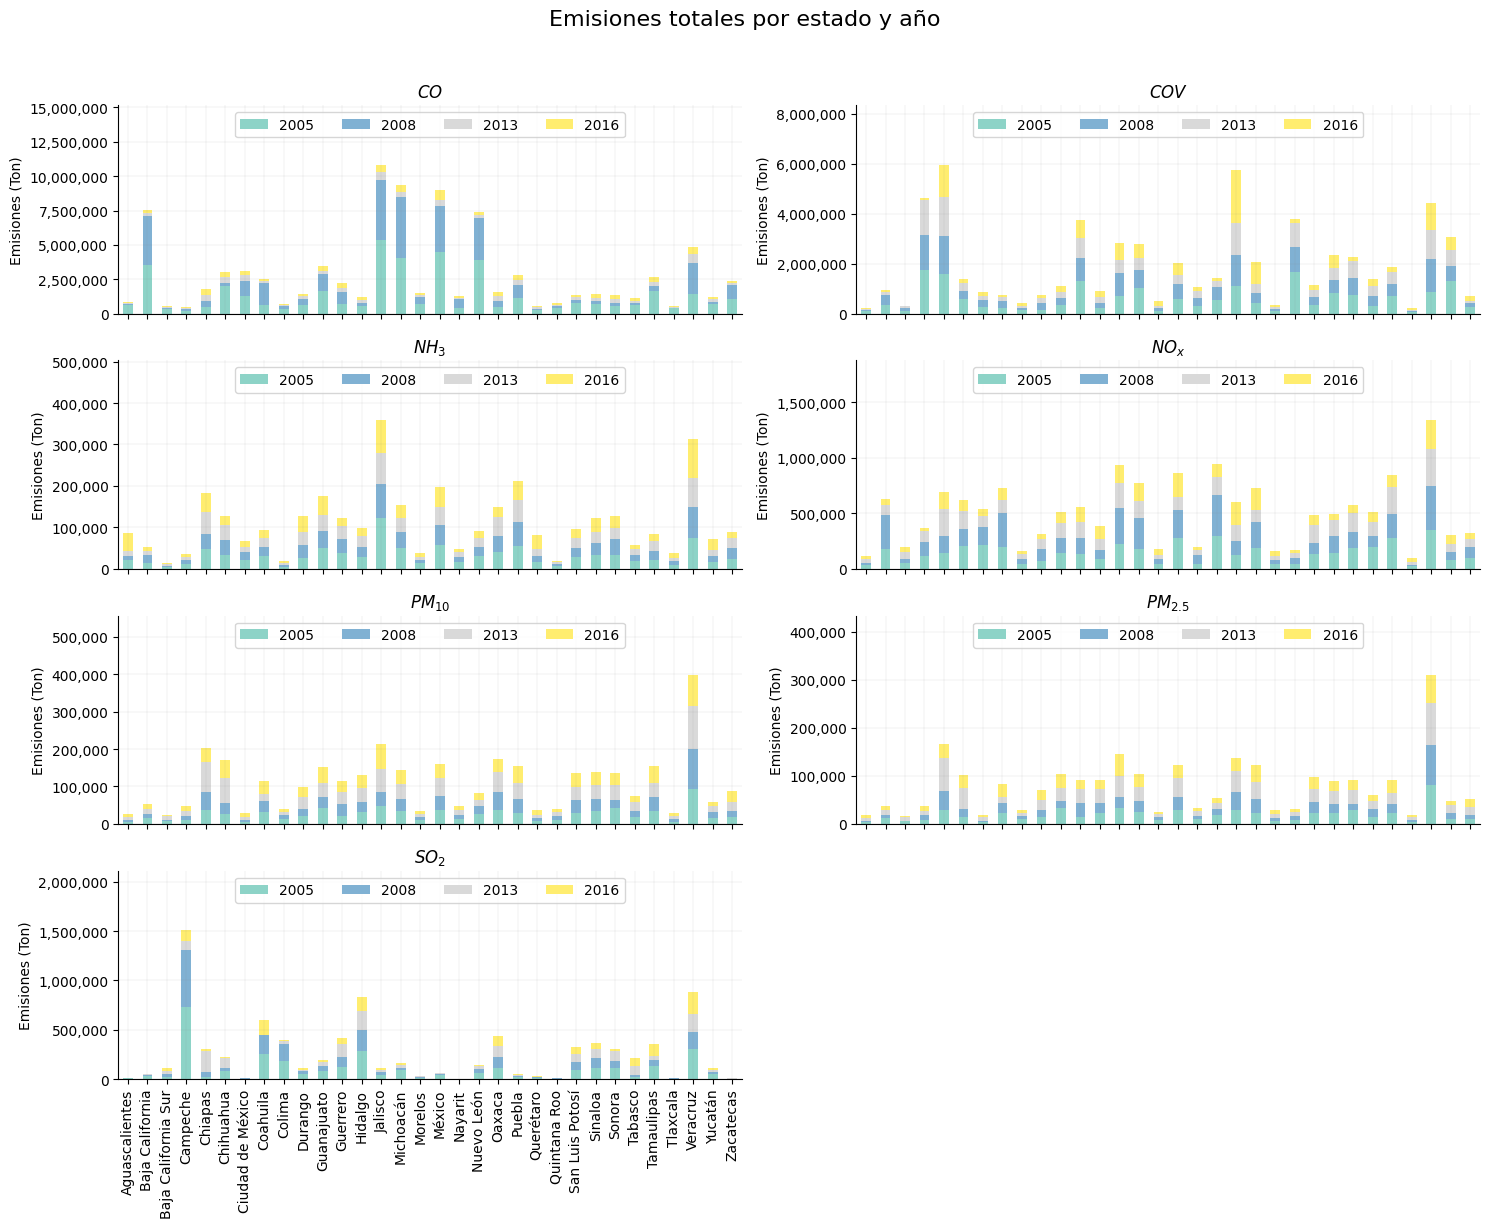

In [125]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=2, nrows=4, sharex=True)

col = 0
row = 0

for emision, df in total_ent.groupby("emision"):
  
  df = df.pivot_table("emisiones","nom_ent","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  df.plot(kind='bar', stacked=True, ax=ax[row, col],  colormap="Set3", alpha=1)
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  # set ylimit from 0 to 40% higher than max value
  ax[row, col].set_ylim(0, df.sum(axis=1).max() * 1.4)
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  
  ax[row, col].legend(ncol=4, loc="upper center")
  # set a gray grid 
  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  
  col += 1
  if col == 2:
    col = 0
    row += 1
fig.delaxes(ax[3,1])
sns.despine()
# set title for the whole figure
fig.suptitle("Emisiones totales por estado y año", fontsize=16, y=1.02)

plt.tight_layout()
#plt.savefig("img/emisiones_total_entidad_FIG1.png", dpi=300)
plt.show()


In [126]:
colima_total_mun = total_mun[total_mun["nom_ent"] == "Colima"]
colima_total_mun.head()

,nom_ent,nom_mun,year,emision,emisiones
70,Colima,Armería,2005,$PM_{10}$,142.90
71,Colima,Colima,2005,$PM_{10}$,792.32
72,Colima,Comala,2005,$PM_{10}$,146.69
73,Colima,Coquimatlán,2005,$PM_{10}$,151.73
74,Colima,Cuauhtémoc,2005,$PM_{10}$,1762.26


In [127]:
colima_total_mun.pivot_table("emisiones","emision","year", aggfunc="sum")

year,2005,2008,2013,2016
emision,,,,
$CO$,335903.22,246451.544267,53845.136525,73318.384472
$COV$,134108.12,94139.384765,76123.568959,101996.884631
$NH_3$,4945.60,4611.792666,4818.393347,4370.217025
$NO_x$,39954.77,51188.238135,36389.118273,26904.538538
$PM_{10}$,12887.14,11595.460384,11757.095609,8949.224690
$PM_{2.5}$,9244.86,7042.879900,9132.339676,6409.431828
$SO_2$,185497.63,168482.325519,89964.178455,16763.837797


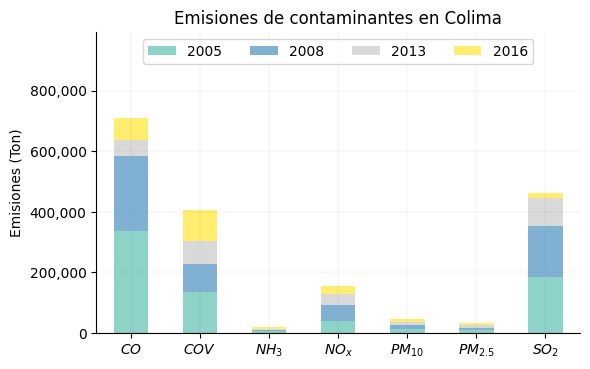

In [128]:
fig, ax = plt.subplots(figsize=(6, 4))

df = colima_total_mun.pivot_table("emisiones","emision","year", aggfunc="sum")

ax.set_title("Emisiones de contaminantes en Colima")
df.plot(kind='bar', stacked=True, ax=ax, colormap="Set3")

# hide xlabel
ax.set_xlabel("")

ax.set_ylabel("Emisiones (Ton)")

# make legend columns to 4 
ax.legend(ncol=4)

# set ylim from 0 to 40% higher than max value
ax.set_ylim(0, df.sum(axis=1).max() * 1.4)

# set y ticks to scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax.legend(ncol=4, loc="upper center")
ax.grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
sns.despine()
plt.tight_layout()

# rotate xticks 90 degrees
plt.xticks(rotation=0)

plt.savefig("img/inem/emisiones_total_colima_FIG2.png", dpi=300)
plt.show()

## Separación por fuentes

In [129]:
fuentes_ent
fuentes_ent_colima = fuentes_ent[fuentes_ent["nom_ent"] == "Colima"]
fuentes_ent_colima

# Set columm "fuente" to lower case
fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].str.lower()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\3242655620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].str.lower()


In [130]:
fuentes_ent_colima.fuente.unique()

array(['area', 'fijas', 'moviles', 'naturales'], dtype=object)

In [131]:
rename_fuente = {
  'area': 'Área',
  'fijas': 'Fijas',
  'moviles': 'Móviles',
  'naturales': 'Naturales',
}

fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].replace(rename_fuente)

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\4167545217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].replace(rename_fuente)


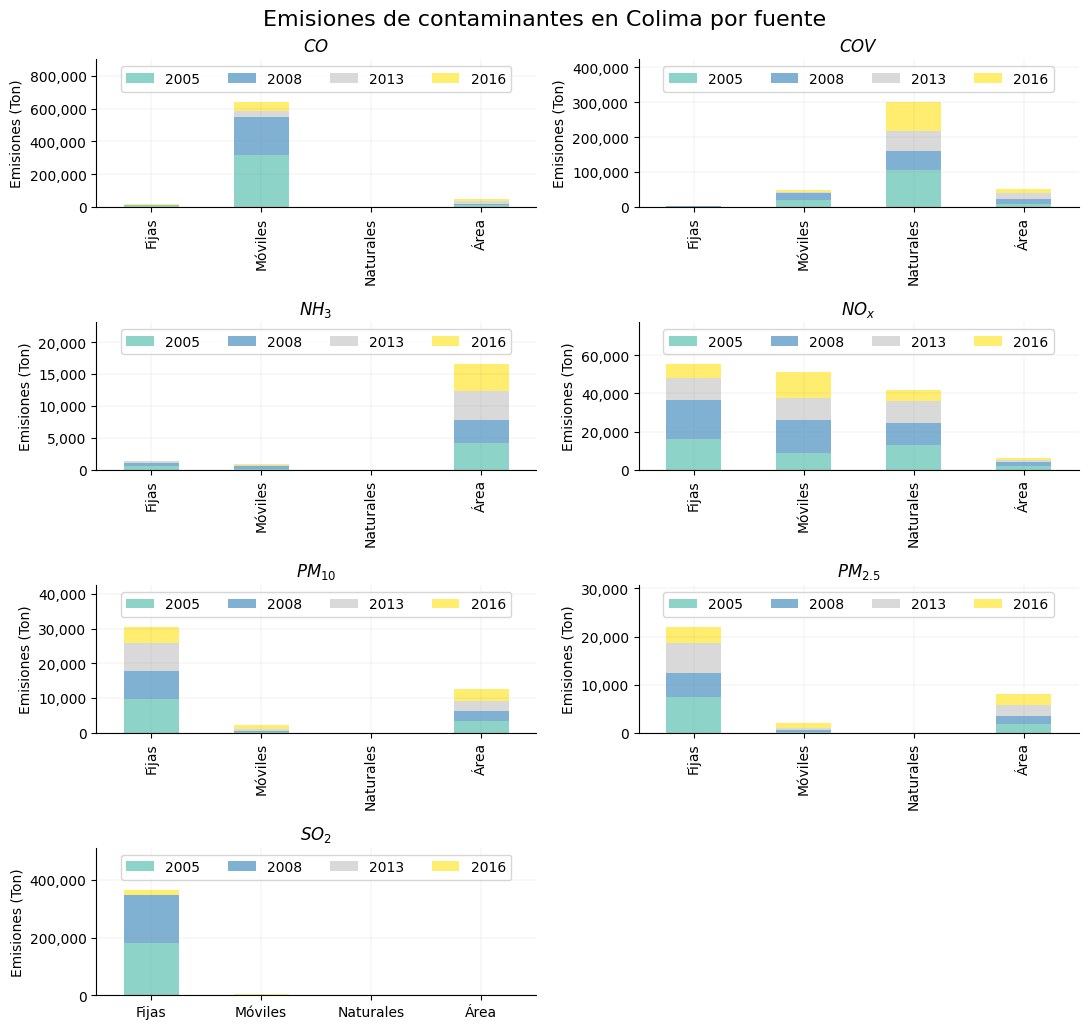

In [132]:
fig, ax = plt.subplots(figsize=(11, 11), ncols=2, nrows=4)

col = 0
row = 0

for emision, df in fuentes_ent_colima.groupby("emision"):
  
  df = df.pivot_table("emisiones","fuente","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  df.plot(kind='bar', stacked=True, ax=ax[row, col],  colormap="Set3" )
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  # make legend columns to 4 and loc to "upper center"
  ax[row, col].legend(ncol=4, loc="upper center")
  
  # set ylim 10% higher than max value in "emisiones" column
  ax[row, col].set_ylim(0, df.sum(axis=1).max() * 1.40)
  
  col += 1
  if col == 2:
    col = 0
    row += 1

# set title to figure
fig.suptitle("Emisiones de contaminantes en Colima por fuente", fontsize=16)    

fig.delaxes(ax[3,1])
plt.tight_layout()
sns.despine()
plt.xticks(rotation=0)
plt.savefig("img/inem/emisiones_fuentes_colima_FIG3.png", dpi=300)
plt.show()


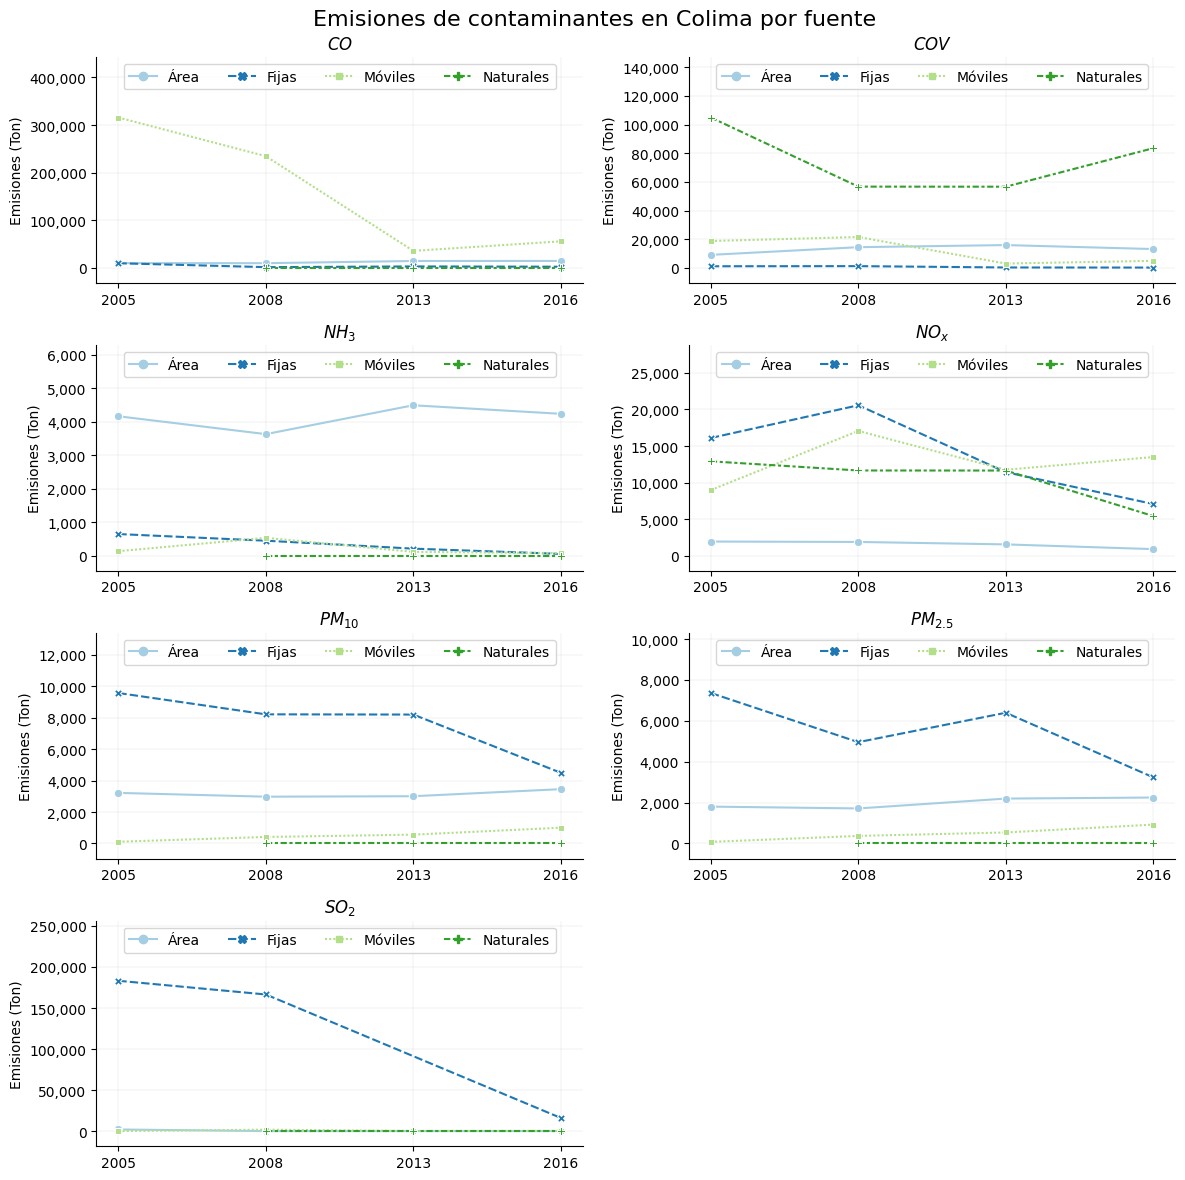

In [133]:
fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=4)

col = 0
row = 0

for emision, df in fuentes_ent_colima.groupby("emision"):
  
  #df = df.pivot_table("emisiones","fuente","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  sns.lineplot(data=df, x="year", y="emisiones", hue="fuente", style="fuente", markers=True, dashes=True, ax=ax[row, col], palette="Paired", sizes=(3, 6))
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

  # make legend columns to 4 and loc to "upper center"
  ax[row, col].legend(ncol=4, loc="upper center")
  
  # set ylim 10% higher than max value in "emisiones" column
  ax[row, col].set_ylim(-df["emisiones"].max() * 0.10, df["emisiones"].max() * 1.40)
  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  
  # remove ax[3,1] because it's empty
  if row == 3 and col == 1:
    ax[row, col].axis("off")
    

  
  col += 1
  if col == 2:
    col = 0
    row += 1

# set title as "Emisiones de contaminantes en Colima por sector"
fig.suptitle("Emisiones de contaminantes en Colima por fuente", fontsize=16) 
sns.despine()
fig.delaxes(ax[3,1])
plt.tight_layout()
plt.savefig("img/inem/emisiones_total_colima_por_sector_FIG4.png", dpi=300)
plt.show()

# Graficos municipal 

In [134]:
# in java: generate an array of 10 random names
# String[] names = new String[10];
# for (int i = 0; i < names.length; i++) {
#   names[i] = UUID.randomUUID().toString();

rename_mun = {
  'Villa de alvarez': 'Villa de Álvarez',
  'Tecoman': 'Tecomán',
  'Cuauhtemoc': 'Cuauhtémoc',
  'Ixtlahuacan': 'Ixtlahuacán',
  'Armeria': 'Armería',
  'Coquimatlan': 'Coquimatlán',
  'Minatitlan': 'Minatitlán',
}


## Sin fuentes

In [135]:
total_mun.head()

,nom_ent,nom_mun,year,emision,emisiones
0,Aguascalientes,Aguascalientes,2005,$PM_{10}$,1989.63
1,Aguascalientes,Asientos,2005,$PM_{10}$,356.04
2,Aguascalientes,Calvillo,2005,$PM_{10}$,302.59
3,Aguascalientes,Cosío,2005,$PM_{10}$,117.07
4,Aguascalientes,Jesús María,2005,$PM_{10}$,768.54


In [136]:
total_mun_colima = total_mun[total_mun["nom_ent"] == "Colima"]
total_mun_colima["nom_mun"] = total_mun_colima["nom_mun"].replace(rename_mun)
total_mun_colima.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\401207910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mun_colima["nom_mun"] = total_mun_colima["nom_mun"].replace(rename_mun)


,nom_ent,nom_mun,year,emision,emisiones
70,Colima,Armería,2005,$PM_{10}$,142.90
71,Colima,Colima,2005,$PM_{10}$,792.32
72,Colima,Comala,2005,$PM_{10}$,146.69
73,Colima,Coquimatlán,2005,$PM_{10}$,151.73
74,Colima,Cuauhtémoc,2005,$PM_{10}$,1762.26


### 3D plot

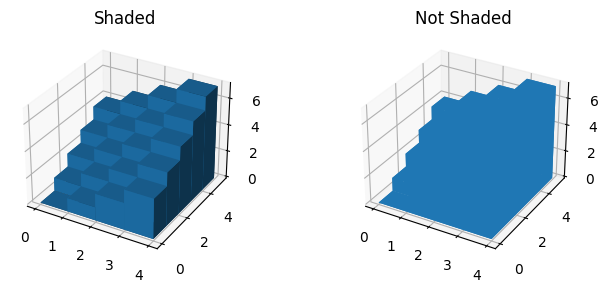

In [137]:

# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()


In [138]:
x

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [139]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

In [140]:
top

array([0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7])

In [180]:
total_mun_colima.head()



nom_mun,Armería,Colima,Comala,Coquimatlán,Cuauhtémoc,Ixtlahuacán,Manzanillo,Minatitlán,Tecomán,Villa de Álvarez
emision,,,,,,,,,,
$CO$,37769.372000,181462.582000,30042.096439,31362.281117,62110.967891,9871.630743,124199.345900,13888.600660,118173.974083,100637.434431
$COV$,30927.948954,61414.185290,20919.360331,31276.952319,23349.026922,33716.599620,91184.334420,21188.851863,60783.182900,31607.515736
$NH_3$,1098.588678,3302.268752,1691.110081,1337.386565,1993.130919,404.721584,3031.817787,546.450691,3702.685157,1637.842825
$NO_x$,6081.155411,21960.404176,4242.122326,4683.212597,9967.977484,2777.309869,67318.530907,2236.646239,24984.270639,10185.035298
$PM_{10}$,1024.962618,2576.275955,775.142896,1168.903811,9556.675414,483.204931,24310.531059,738.148125,3259.230883,1295.844992


In [142]:
total_mun_colima.head()
total_mun_colima3D = total_mun_colima[['emision','nom_mun', 'year', 'emisiones']]


In [183]:
total_mun_colima3D["emision"].unique()

array(['$CO$', '$COV$', '$NH_3$', '$NO_x$', '$PM_{10}$', '$PM_{2.5}$',
       '$SO_2$'], dtype=object)

In [176]:


total_mun_colima3D.shape

total_mun_colima3D.sort_values(by=['emision','nom_mun', 'year'], inplace=True)
total_mun_colima3D['x'] = total_mun_colima3D.groupby(by='year').cumcount()
total_mun_colima3D['y'] = total_mun_colima3D.groupby('nom_mun').cumcount()

y = [0, 1, 2, 3]*70

total_mun_colima3D

,emision,nom_mun,year,emisiones,x,y
19744,$CO$,Armería,2005,18634.540000,0,0
22201,$CO$,Armería,2008,13145.383880,0,1
24660,$CO$,Armería,2013,2989.390045,0,2
27120,$CO$,Armería,2016,3000.058075,0,3
19745,$CO$,Colima,2005,85783.860000,1,0
...,...,...,...,...,...,...
66476,$SO_2$,Tecomán,2016,109.745881,68,27
59101,$SO_2$,Villa de Álvarez,2005,128.750000,69,24
61558,$SO_2$,Villa de Álvarez,2008,39.091933,69,25
64017,$SO_2$,Villa de Álvarez,2013,55.239282,69,26


In [209]:
# list of 10 colors by name
colors = ["red", "green", "blue", "orange", "purple", "brown", "pink", "gray", "olive", "cyan"]

# repeat each color 4 times example: ["red", "red", "red", "red", "green", "green", "green", "green", ...]
colors = [ color for color in colors for _ in range(4) ]

In [211]:
emision.head()

,emision,nom_mun,year,emisiones,x,y
59092,$SO_2$,Armería,2005,49.860000,60,24
61549,$SO_2$,Armería,2008,26.003760,60,25
64008,$SO_2$,Armería,2013,460.374754,60,26
66468,$SO_2$,Armería,2016,467.776894,60,27
59093,$SO_2$,Colima,2005,350.280000,61,24


C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


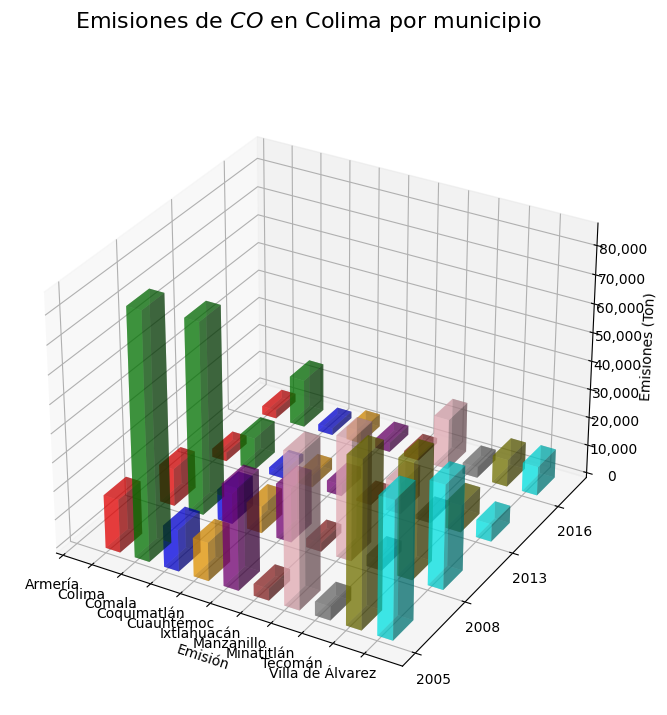

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


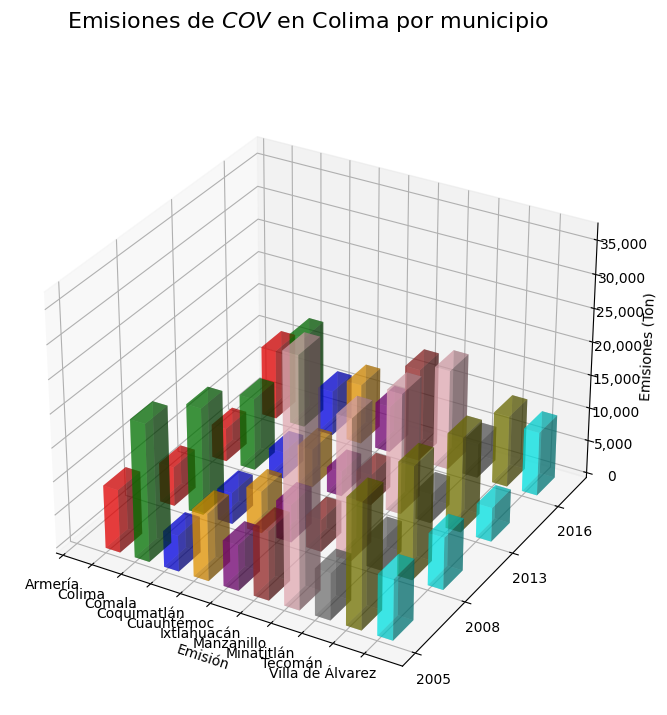

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


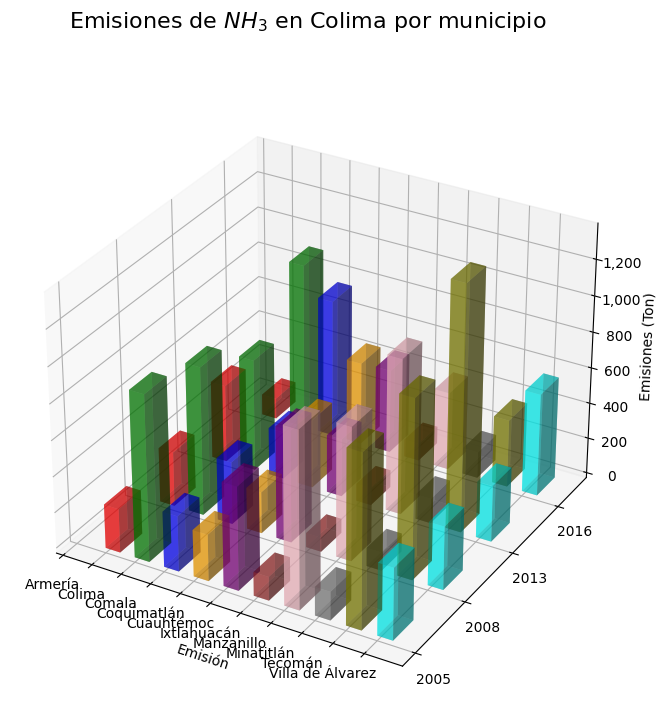

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


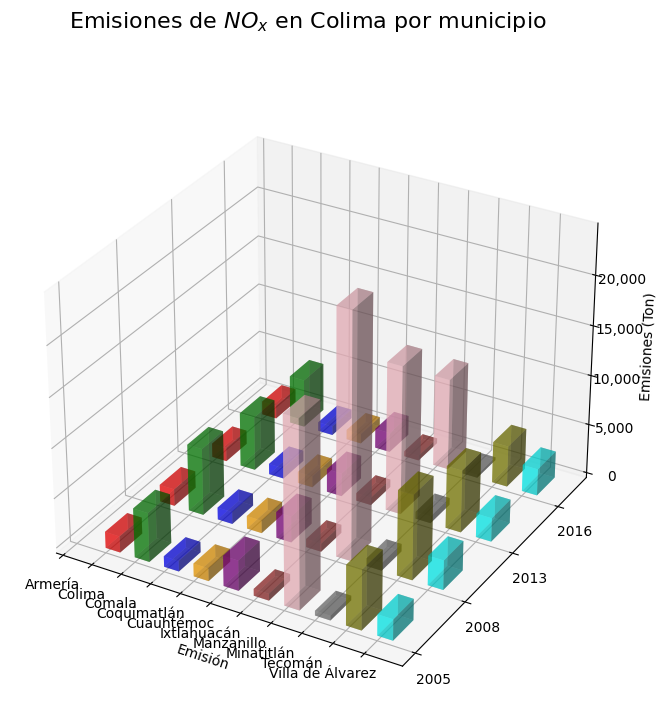

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


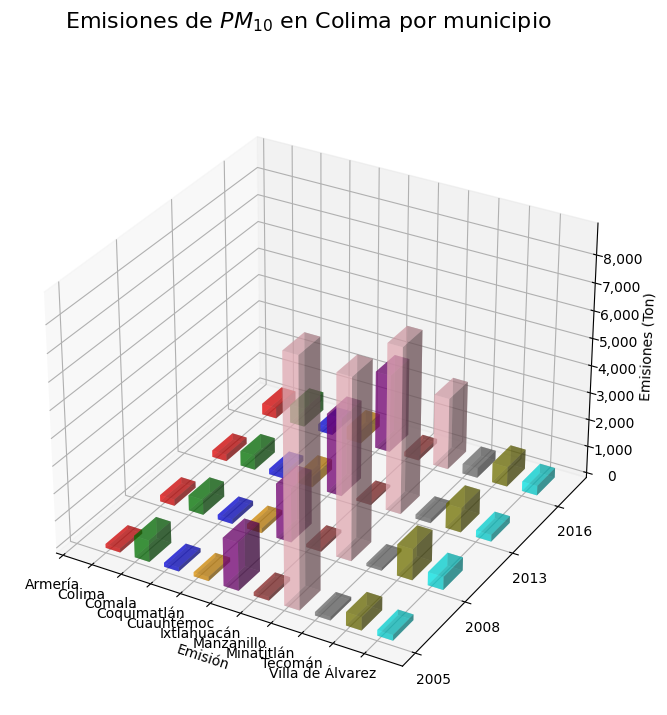

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


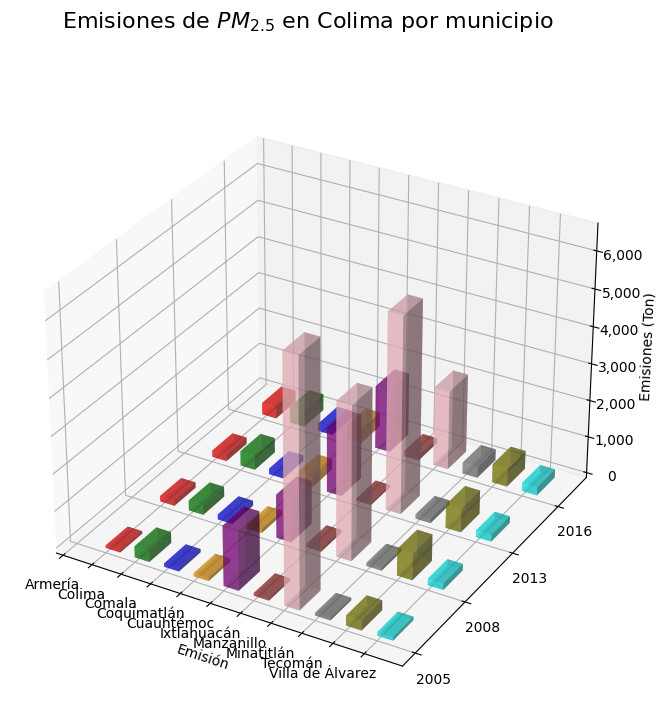

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emision["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\2819117787.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


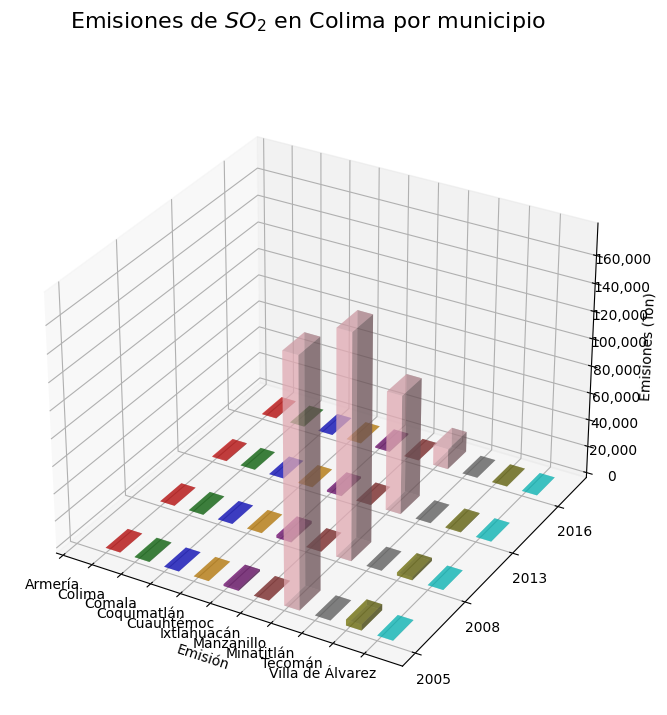

In [231]:
for i, emision in total_mun_colima3D.groupby('emision'):
     fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))
  
     bottom = 0
     width = 0.5
     depth = 0.4
  
     # set title to figure
     fig.suptitle(f"Emisiones de {i} en Colima por municipio", fontsize=16)
     emision['x'] = emision.groupby(by='year').cumcount()
     
     ax.sca
     
     ax.bar3d(
          emision["x"], 
          y, 
          bottom, width, depth, 
          emision["emisiones"], 
          shade=True, 
          color=colors, 
          alpha=0.5)
     
     ax.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

     ax.set_xticklabels(emision["nom_mun"].unique())
     # show all ticks
     ax.set_xticks(np.arange(-1, 10, 1))
     
     #ax.set_xlim(-1, 11)

     ax.set_yticks(np.arange(0, 4, 1))
     ax.set_yticklabels(emision["year"].unique())
     #ax.set_ylim(0, 4)

     ax.set_xlabel("Emisión")
     ax.set_zlabel("Emisiones (Ton)")

     plt.tight_layout()
     plt.show()
     


In [163]:
280/4

70.0

C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\1698851168.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(total_mun_colima3D["emision"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\1698851168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(total_mun_colima3D["year"].unique(), rotation=-20)
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\1698851168.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


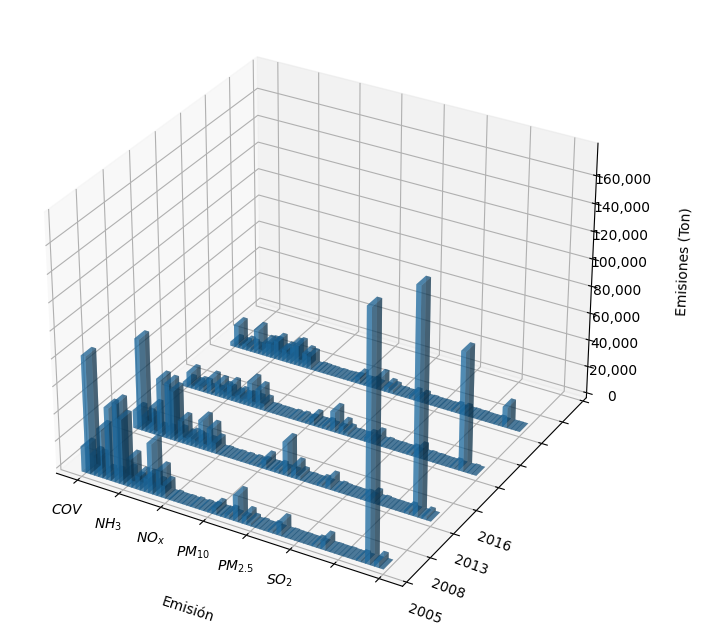

In [186]:
# %matplotlib notebook   esto vuelve interactivo el plot
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(projection='3d')

bottom = 0
width = 1.1
depth = 0.2

# generate a list of 70 random name colors
#colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 70)]


ax1.bar3d(
       total_mun_colima3D["x"], 
       y, 
       bottom, width, depth, 
       total_mun_colima3D["emisiones"], 
       shade=True, 
       #color=colors, 
       alpha=0.5)

ax1.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

ax1.set_xticklabels(total_mun_colima3D["emision"].unique())

ax1.set_yticklabels(total_mun_colima3D["year"].unique(), rotation=-20)
ax1.set_ylim(0, 4)

ax1.set_xlabel("Emisión", labelpad=20)
ax1.set_zlabel("Emisiones (Ton)", labelpad=20)

plt.tight_layout()
plt.show()

In [145]:
mun_colima_grouped = total_mun_colima.groupby(["nom_mun", "emision"]).sum().reset_index()

mun_colima_grouped.sort_values(by=["nom_mun","emision"], inplace=True)

# add column x; if nom_mun == "Armería" then x = 1, then 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
mun_colima_grouped["y"] = mun_colima_grouped.groupby("emision").cumcount() + 1
mun_colima_grouped["x"] = mun_colima_grouped.groupby("nom_mun").cumcount() + 1
mun_colima_grouped.head(10)

,nom_mun,emision,emisiones,y,x
0,Armería,$CO$,37769.372000,1,1
1,Armería,$COV$,30927.948954,1,2
2,Armería,$NH_3$,1098.588678,1,3
3,Armería,$NO_x$,6081.155411,1,4
4,Armería,$PM_{10}$,1024.962618,1,5
5,Armería,$PM_{2.5}$,719.570234,1,6
6,Armería,$SO_2$,1004.015407,1,7
7,Colima,$CO$,181462.582000,2,1
8,Colima,$COV$,61414.185290,2,2
9,Colima,$NH_3$,3302.268752,2,3


In [146]:
mun_colima_grouped.sort_values(by='emisiones')

,nom_mun,emision,emisiones,y,x
55,Minatitlán,$SO_2$,49.487330,8,7
20,Comala,$SO_2$,70.251209,3,7
41,Ixtlahuacán,$SO_2$,95.211935,6,7
27,Coquimatlán,$SO_2$,105.271679,4,7
69,Villa de Álvarez,$SO_2$,285.269368,10,7
...,...,...,...,...,...
63,Villa de Álvarez,$CO$,100637.434431,10,1
56,Tecomán,$CO$,118173.974083,9,1
42,Manzanillo,$CO$,124199.345900,7,1
7,Colima,$CO$,181462.582000,2,1


C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\3816164191.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mun_colima_grouped["nom_mun"].unique())
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\3816164191.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(mun_colima_grouped["emision"].unique(), rotation=-20)
C:\Users\pedro\AppData\Local\Temp\ipykernel_16992\3816164191.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


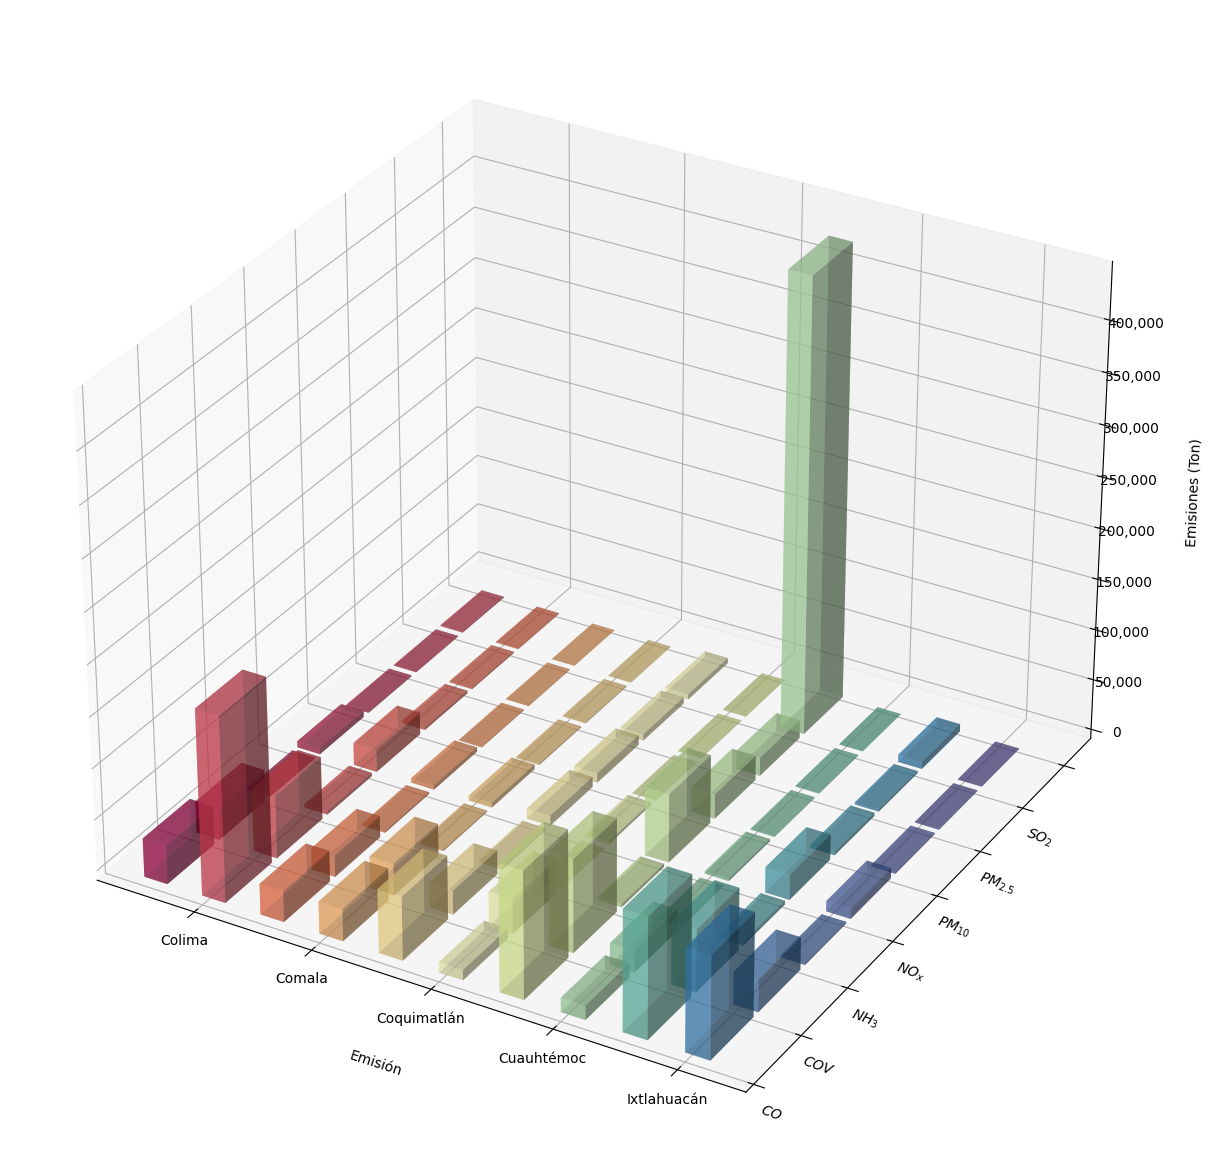

In [147]:
# %matplotlib notebook   esto vuelve interactivo el plot
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(projection='3d')

bottom = np.zeros_like(80)
width = 0.4
depth = 0.9
# generate a list of 70 random name colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 70)]


ax1.bar3d(
       mun_colima_grouped["y"], 
       mun_colima_grouped["x"], 
       bottom, width, depth, 
       mun_colima_grouped["emisiones"], 
       shade=True, 
       color=colors, 
       alpha=0.5)

ax1.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# replace set_xticklabels "nom_mun"
# if Armería is the first mun, then xticks = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

ax1.set_xticklabels(mun_colima_grouped["nom_mun"].unique())
#ax1.set_xlim(1, 11)
#
## replace yticks by mun_colima_grouped["emision"].unique()
ax1.set_yticklabels(mun_colima_grouped["emision"].unique(), rotation=-20)
ax1.set_ylim(1, 8.5)

# increse distance between xticks and yticks 
#ax1.tick_params(axis='y', pad=10)

#ax1.set_ylabel("Municipio", labelpad=20)
ax1.set_xlabel("Emisión", labelpad=20)
ax1.set_zlabel("Emisiones (Ton)", labelpad=20)


plt.tight_layout()
plt.show()


In [148]:
[0.3]*5

[0.3, 0.3, 0.3, 0.3, 0.3]

In [149]:
mun_colima_grouped["nom_mun"].unique()

array(['Armería', 'Colima', 'Comala', 'Coquimatlán', 'Cuauhtémoc',
       'Ixtlahuacán', 'Manzanillo', 'Minatitlán', 'Tecomán',
       'Villa de Álvarez'], dtype=object)

In [150]:
import datetime

In [151]:
# set total_mun_colima from long to wide with multiple index
total_mun_colima = total_mun_colima.pivot_table("emisiones", "emision", "nom_mun", aggfunc="sum")
total_mun_colima.head()

nom_mun,Armería,Colima,Comala,Coquimatlán,Cuauhtémoc,Ixtlahuacán,Manzanillo,Minatitlán,Tecomán,Villa de Álvarez
emision,,,,,,,,,,
$CO$,37769.372000,181462.582000,30042.096439,31362.281117,62110.967891,9871.630743,124199.345900,13888.600660,118173.974083,100637.434431
$COV$,30927.948954,61414.185290,20919.360331,31276.952319,23349.026922,33716.599620,91184.334420,21188.851863,60783.182900,31607.515736
$NH_3$,1098.588678,3302.268752,1691.110081,1337.386565,1993.130919,404.721584,3031.817787,546.450691,3702.685157,1637.842825
$NO_x$,6081.155411,21960.404176,4242.122326,4683.212597,9967.977484,2777.309869,67318.530907,2236.646239,24984.270639,10185.035298
$PM_{10}$,1024.962618,2576.275955,775.142896,1168.903811,9556.675414,483.204931,24310.531059,738.148125,3259.230883,1295.844992


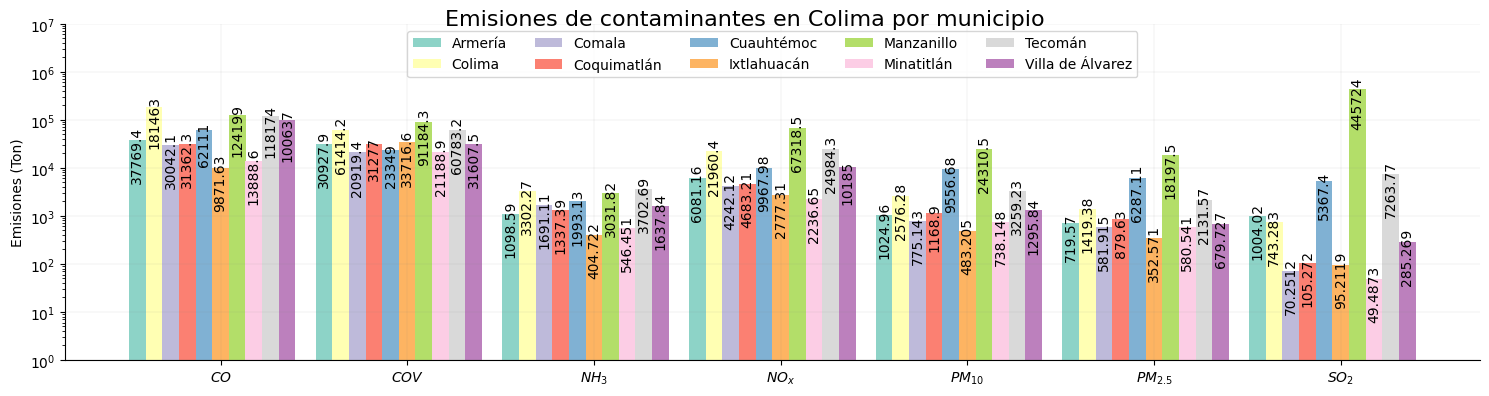

In [152]:
fig, ax = plt.subplots(figsize=(15, 4))

x = np.arange(len(total_mun_colima.index.unique()))
width = 0.09
labels = total_mun_colima.index

for xtick in x:
  # iterate over columns
  contador = -5
  for ytick, col in enumerate(total_mun_colima.columns):
    # set colormap to Set3

    rect = ax.bar(xtick + width / 1.01 * contador, total_mun_colima.loc[total_mun_colima.index.unique()[xtick], col], width, label=col,  color=plt.cm.Set3(ytick))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    
    ax.bar_label(rect, label_type='center', rotation=90)
    # set logaritmic scale
    ax.set_yscale("log")
    
    # set ylimit as 0 to 1E7 (10 million) using log scale
    ax.set_ylim(1E0, 1E7) 
    
    contador += 1
    #ax.bar_label(rect, padding=3)
  if xtick == 0:
    ax.legend(ncol=5, loc="upper center")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Emisiones (Ton)")
ax.set_xticks(x, labels)

sns.despine()

# set a gray grid 
ax.grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)

#ax.legend()
fig.tight_layout()

# set title as "Emisiones de contaminantes en Colima por municipio"
fig.suptitle("Emisiones de contaminantes en Colima por municipio", fontsize=16)

# add values to each bar


plt.savefig("img/inem/emisiones_municipios_colima_FIG5.png", dpi=300)
plt.show()


In [153]:
total_mun_colima.head()

nom_mun,Armería,Colima,Comala,Coquimatlán,Cuauhtémoc,Ixtlahuacán,Manzanillo,Minatitlán,Tecomán,Villa de Álvarez
emision,,,,,,,,,,
$CO$,37769.372000,181462.582000,30042.096439,31362.281117,62110.967891,9871.630743,124199.345900,13888.600660,118173.974083,100637.434431
$COV$,30927.948954,61414.185290,20919.360331,31276.952319,23349.026922,33716.599620,91184.334420,21188.851863,60783.182900,31607.515736
$NH_3$,1098.588678,3302.268752,1691.110081,1337.386565,1993.130919,404.721584,3031.817787,546.450691,3702.685157,1637.842825
$NO_x$,6081.155411,21960.404176,4242.122326,4683.212597,9967.977484,2777.309869,67318.530907,2236.646239,24984.270639,10185.035298
$PM_{10}$,1024.962618,2576.275955,775.142896,1168.903811,9556.675414,483.204931,24310.531059,738.148125,3259.230883,1295.844992


In [154]:
x

array([0, 1, 2, 3, 4, 5, 6])

In [155]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

In [156]:
top

array([0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7])

## Fuentes

In [157]:
fuentes_mun.head()
fuentes_mun["emision"] = fuentes_mun["emision"].replace(replace_emision)
fuentes_mun.head()

,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,$PM_{10}$,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,$PM_{10}$,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,$PM_{10}$,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,$PM_{10}$,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,$PM_{10}$,431.452577
